In [1]:
import pandas as pd
import numpy as np

# CCTV 설치 현황

In [3]:
CCTV_Seoul = pd.read_excel("../Data/CCTV_in_Seoul_2018.xlsx")

In [5]:
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [6]:
CCTV_Seoul.tail()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [7]:
# NaN은 결측치 (null값)도 정리해야한다.
# CCTV_Seoul의 컬러명 확인
# object는 숫자, 문자 상관없이 받는다.
CCTV_Seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [8]:
CCTV_Seoul.columns[0]

'기관명'

In [10]:
# 컬럼이름 변경 : 기관명 => 구별
# inplace = True는 바로 적용
CCTV_Seoul.rename(columns = {CCTV_Seoul.columns[0] : '구별'}, inplace = True) 
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [13]:
# NaN데이터의 위치 및 내용 확인
CCTV_Seoul[CCTV_Seoul['2011년 이전'].isnull()] # 2011년 이전 컬럼에서 null값을 가진 데이터 찾기

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
10,동대문구,2003,NaN,NaN,NaN,1326,111,233,136,197
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [14]:
# 개수 파악
len(CCTV_Seoul[CCTV_Seoul['2011년 이전'].isnull()])

2

In [19]:
# NaN을 0으로 변환하기
CCTV_Seoul = CCTV_Seoul.fillna(0)
CCTV_Seoul.tail()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9


---
# 인구현황

In [20]:
pop_Seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx")
pop_Seoul.head()

,report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,기간,자치구,세대,인구,인구,인구,인구,인구,인구,인구,인구,인구,세대당인구,65세이상고령자
1,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
2,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
3,2020.1/4,합계,4354006,10013781,4874995,5138786,9733655,4742217,4991438,280126,132778,147348,2.24,1518239
4,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073


In [22]:
pop_Seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx", 
                          header = 3,
                          usecols = "B, D, G, J, N"
                         )
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [25]:
# 컬럼명 변경
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                            pop_Seoul.columns[1] : '인구수',
                            pop_Seoul.columns[2] : '한국인',
                            pop_Seoul.columns[3] : '외국인',
                            pop_Seoul.columns[4] : '고령자'},
                inplace = True
                )
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [26]:
# 합계 행을 삭제
pop_Seoul.drop([0], inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


In [27]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,516662,499374,17288,76664
22,서초구,434801,430568,4233,58332
23,강남구,549898,544804,5094,72602
24,송파구,680883,674095,6788,89539
25,강동구,457042,452646,4396,66401


---
# CCTV 현황

In [28]:
# CCTV에서 소계로 오름차순 정렬
CCTV_Seoul.sort_values(by = '소계', ascending=True) #데이터로 정렬하려면 values

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346
17,송파구,1586,600.0,99.0,88.0,21,166,100,116,396
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530
11,동작구,1780,238.0,93.0,29.0,503,130,254,278,255


In [29]:
# CCTV에서 소계로 내림차순 정렬
CCTV_Seoul.sort_values(by = '소계', ascending=False) #데이터로 정렬하려면 values

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
14,서초구,2835,1172.0,91.0,228.0,134,215,352,247,396
18,양천구,2775,772.0,161.0,185.0,169,172,349,137,830
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793
13,서대문구,2121,565.0,233.0,214.0,114,109,277,415,194


### 3년간 CCTV 증가율을 구해서 CCTV가 제일 많이 증가한 구를 검색

In [30]:
# 최근 증가율 : 최근 3년치 CCTV개수(2016 ~ 2018) 더하고
# 나머지 년도의 CCTV 대수의 합으로 나누어서 100을 곱한다.

CCTV_Seoul['최근증가율'] = (CCTV_Seoul.iloc[:, 7:10].sum(axis=1) /
                      (CCTV_Seoul.iloc[:, 2:7].sum(axis=1)) * 100) #axis=1 은 행방향, 2번은 열방향
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425


In [34]:
# 최근 3년간 CCTV 증가율이 제일 높은 5곳을 추출하기
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


---
# 인구현황

In [35]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


In [37]:
# 구별 항목의 유일성 확인
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [38]:
# 구별 개수 파악
len(pop_Seoul['구별'].unique())

25

In [39]:
# 고령자 비율과 외국인 비율 계산 후 적용
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [43]:
# 인구수가 높은 지역 5군데 보기
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
23,강남구,549898,544804,5094,72602,0.926354,13.202812
11,노원구,535495,531037,4458,82682,0.832501,15.440294
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [44]:
# 외국인수가 높은 지역 5군데 보기
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328
6,동대문구,362793,346156,16637,60367,4.585811,16.639516


In [45]:
# 고령자수가 높은 지역 5군데 보기
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [46]:
# 고령자 비율이 높은 지역 5군데 보기
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171
2,중구,136469,126175,10294,23794,7.543105,17.435462
1,종로구,161984,151217,10767,28073,6.646953,17.330724
12,은평구,482509,478019,4490,82245,0.930553,17.045278


### 정리
인구수가 제일 많은 지역은 송파구지만, 영등포구가 제일 외국인이 많다.
그리고 그 근처라고 할 수 있는 구로구, 금천구 등도 외국인이 많다.
송파구는 고령자가 제일 많지만 고령자의 비율은 높지 않은 것이 확인된다.
강북구, 종로구, 중구, 용산구, 서대문구 같은 경우에는    
인구수 대비 고령자 비율이 높기 때문에 추후 고령화가 우려된다.

---
# CCTV와 인구현황 합치기

In [48]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '구별') # 특정 컬럼 기준 합치기
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [49]:
# 반복문을 이용한 년도별 CCTV 컬럼 삭제

delColumn = data_result.columns[2:10]

for i in delColumn:
    del data_result[i]
    
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [50]:
# 인덱스 변경하기

data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


---
### 상관계수
- 상관계수의 절대값이 0.3이하 : 무시 (관련없다)
- 상관계수의 절대값이 0.3초과 : 약한 상관관계
- 상관계수의 절대값이 0.7이상 : 강한 상관관계

In [51]:
# 고령자 비율과 소계의 상관게수
# -면 역상관관계 고령자가 늘어날수록 CCTV가 줄어드는 약한 상관관계를 띈다.
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

In [52]:
# 외국인 비율과 소계의 상관계수
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

In [55]:
# 인구수와 소계의 상관계수
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

---
# 시각화

In [56]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc

# 시각화 도구
from matplotlib import pyplot as plt
%matplotlib inline

In [57]:
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [58]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [59]:
data_result.to_csv("../Data/CCTV_result.csv") # 파일 저장하기

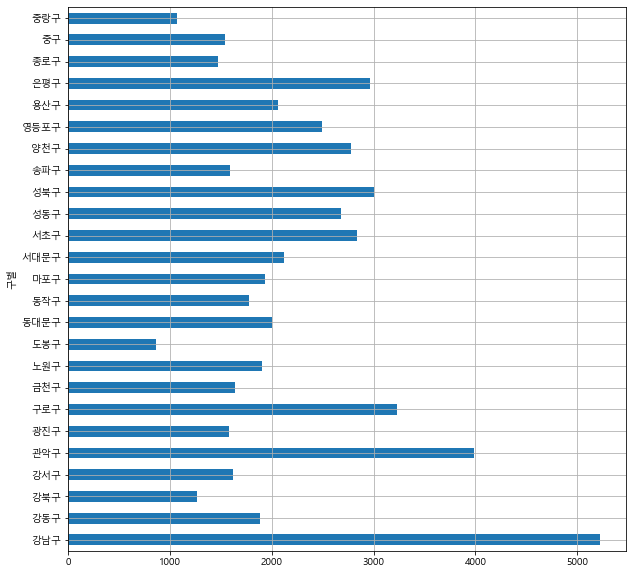

In [63]:
# 막대 그래프
data_result['소계'].plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

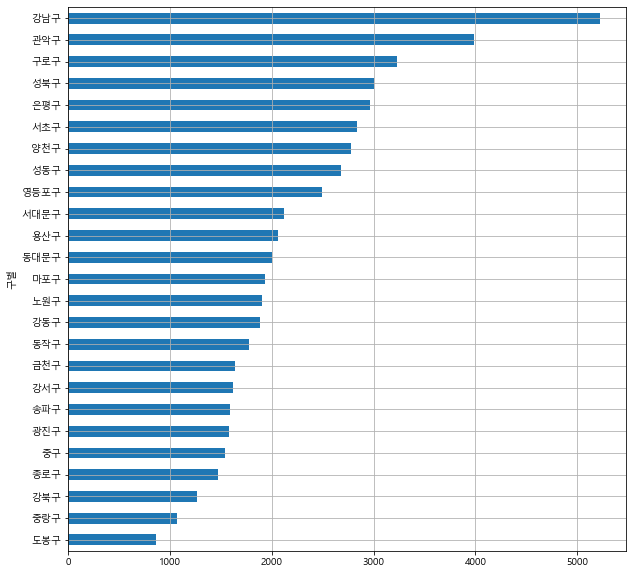

In [68]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show() # sort_values()를 집어넣으면 정렬, 세로막대는 bar

---
## 인구대비 CCTV 비율 

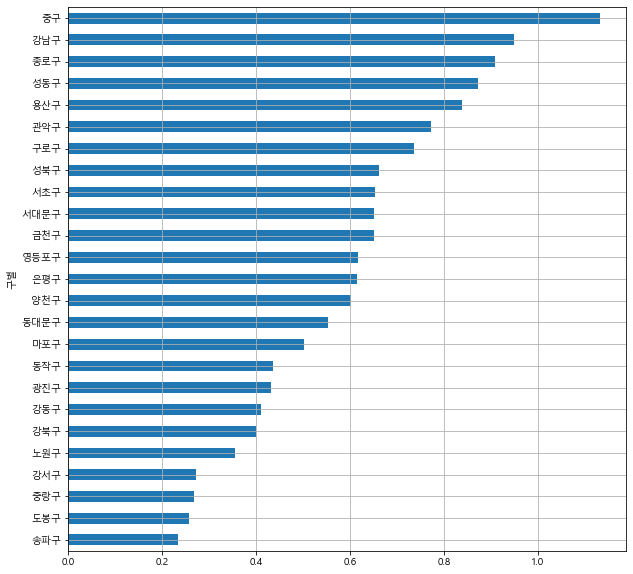

In [73]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

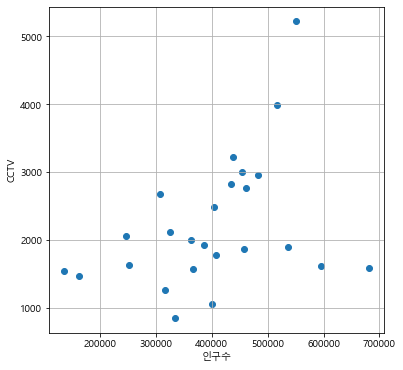

In [76]:
# 산점도를 이용한 시각화 (데이터가 어떻게 분포해있는지)

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [77]:
# 인구수, 소계에 따른 기준선(회귀선, 중심선) 만들기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.88522756e-03, 1.06403852e+03])

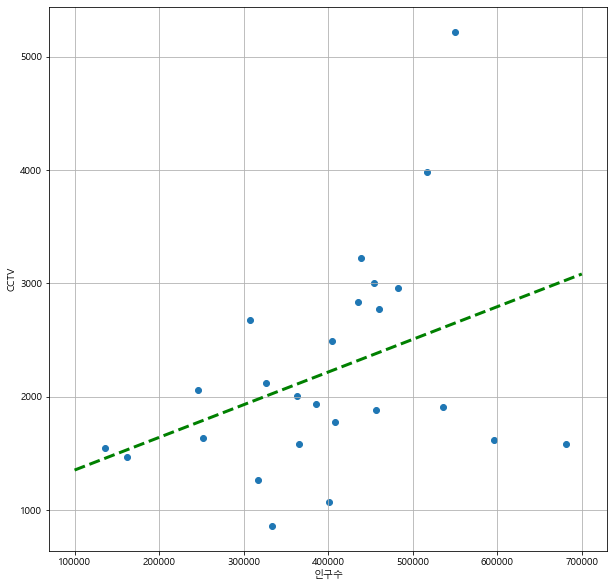

In [82]:
# y축 데이터 만들기 : CCTV소계
fl = np.poly1d(fp1)

# x축 데이터 만들기 : 인구수
fx = np.linspace(100000, 700000)

plt.figure(figsize=(10, 10))
plt.scatter(data_result['인구수'], data_result['소계'])
plt.plot(fx, fl(fx), ls = 'dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()


### 직선과의 오차를 구하는 공식과 오차가 큰 순으로 데이터 정렬 후 그래프 그리기


In [85]:
# 기준선 구하기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

# y축 데이터 만들기 : CCTV소계
fl = np.poly1d(fp1)

# x축 데이터 만들기 : 인구수
fx = np.linspace(100000, 700000)

# 소계에서 기준인구수 차이로 오차값 구하기
data_result['오차'] = np.abs(data_result['소계'] - fl(data_result['인구수']))

# 정렬
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.949449,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,0.232933,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.771297,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,0.257275,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.271444,1165.777237


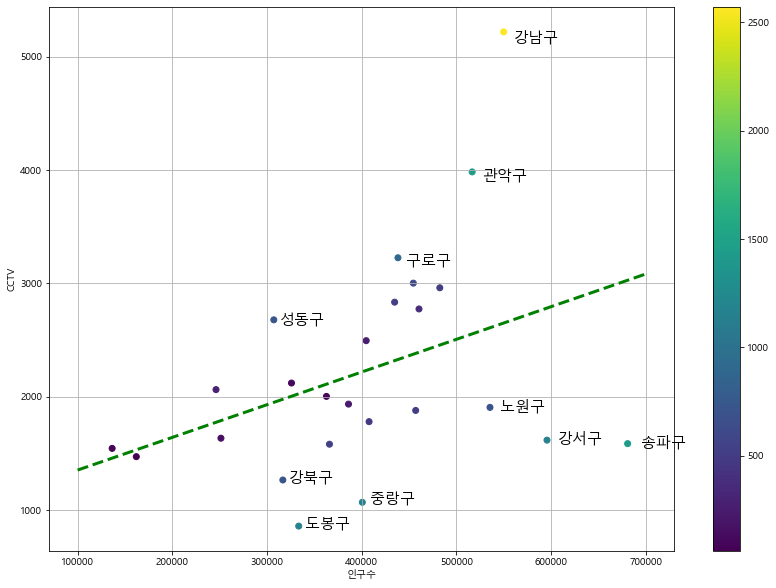

In [92]:
# 그래프에 텍스트와 color
plt.figure(figsize=(14, 10))
plt.scatter(data_result['인구수'], data_result['소계'], c= data_result['오차']) # 산점도 그리기(x, y)
plt.plot(fx, fl(fx), ls = 'dashed', lw=3, color='g')

# 오차가 가장 큰 10개구에 텍스트 붙이기
for n in range(10):
    plt.text(df_sort['인구수'][n] * 1.02, df_sort['소계'][n] * 0.98,
             df_sort.index[n], fontsize=15
            ) # 정렬해놓은 데이터를 이용 / 1.02는 오른쪽으로 향하기 위한 값
    
plt.colorbar()
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()